# Advanced Linear Regression Analysis Assignment


#### Objective:
Refine your understanding of linear regression, including its evaluation and optimization, through hands-on practice with the Boston Housing dataset. This assignment encompasses data loading, cleaning, exploration, implementing linear regression, and evaluating the model using various metrics.



#### Dataset: Boston Housing Dataset
This dataset can be loaded from the `sklearn.datasets` module. It includes data on various aspects of housing in the Boston Massachusetts area.


#### Part 1: Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_11720\16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


**1. Data Loading**: Load the Boston Housing dataset using `sklearn.datasets.load_boston()`.

In [3]:
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['MEDV'] = target

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**2. Data Cleaning**: Check for and handle any missing or null values.

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**3. Data Exploration**: Provide a statistical summary of the dataset's features and visualize the distribution of key features.

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
val = df.describe()
val

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, "Statistical Summary of the Dataset's")

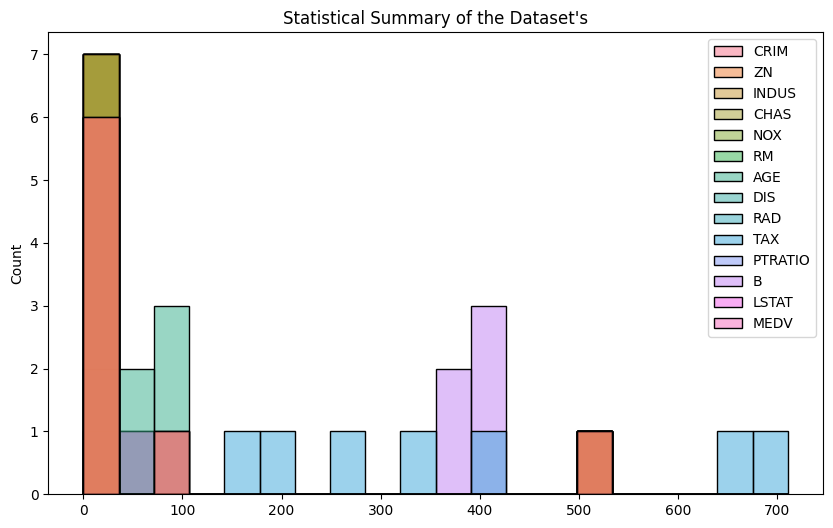

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(val, bins=20)
plt.title("Statistical Summary of the Dataset's")

Text(0.5, 1.0, "Summary of the Dataset's")

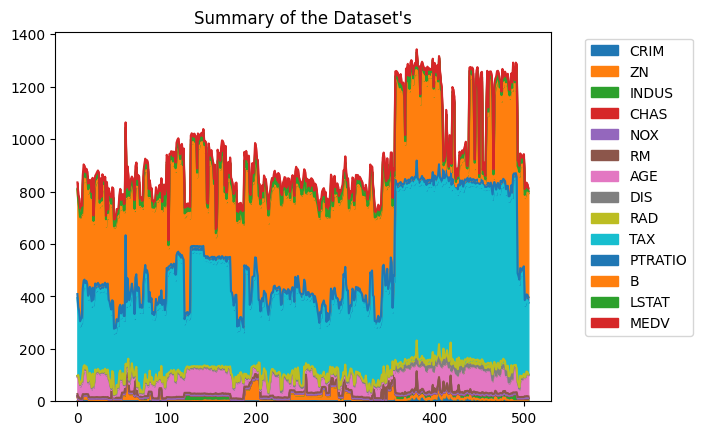

In [10]:
# plt.figure(figsize=(14,8))
df.plot.area()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title("Summary of the Dataset's")

#### Part 2: Linear Regression Implementation and Evaluation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train_df, test_df = train_test_split(df,test_size=0.2, random_state=24)
train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37,20.4
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97,20.0
104,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,7.2
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99,7.4


In [12]:
test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47,19.5
269,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65,20.7
119,0.14476,0.0,10.01,0.0,0.547,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61,19.3
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
82,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72,24.8
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5


In [13]:
train_inputs=train_df.drop(columns=['MEDV'])
train_output=train_df[['MEDV']]
test_inputs=test_df.drop(columns=['MEDV'])
test_output=test_df[['MEDV']]

**1. Linear Regression Model**: Implement a linear regression model predicting the median value of homes.

In [14]:
model = LinearRegression()
model.fit(train_inputs, train_output)

LinearRegression()

In [15]:
pred = model.predict(test_inputs)

**2. Evaluation Metrics**: Evaluate your model using MAE, MSE, RMSE, and R-squared metrics.

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
mae=mean_absolute_error(test_output, pred)
mse=mean_squared_error(test_output, pred)
rmse = np.sqrt(mse)
r2=r2_score(test_output,pred)

In [18]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.2869941070873367
Mean Squared Error (MSE): 23.674484441734787
Root Mean Squared Error (RMSE): 4.865643271113778
R-squared (R2): 0.6504843961717349



#### Submission Guidelines:
- Document every step of your process, from data preparation to model evaluation.
- Ensure your code is well-commented to clarify the purpose behind each operation.
- Submit your completed assignment as a Jupyter Notebook (.ipynb).



#### Assessment Criteria:
- Completeness and accuracy of data preparation and exploratory analysis.
- Proper implementation and evaluation of the linear regression model.
- Clarity and organization of the submitted notebook.
